In [28]:
import csv
from numpy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from convert_csv_files_inputsignals_tosimulate import datos_componente
from convert_csv_files_inputsignals_tosimulate import sparams_to_power
from convert_csv_files_inputsignals_tosimulate import datos_simulados_RI
import toml
toml_name="input_params_simulation_V1"
toml_file=str(toml_name)+".toml"
data=toml.load(toml_file)

In [29]:
data

{'Sky': {'Temperature': 8},
 '4KCL': {'Temperature': 8, 'RL': -40},
 'Window': {'Temperature': 300, 'RL': -20, 'IL': -0.01},
 'IRfilter': {'Temperature': 50, 'RL': -25, 'IL': -0.003},
 'FeedHornSky': {'Temperature': 5, 'RL': -30, 'IL': -0.05},
 'OMTsky': {'Temperature': 5, 'RL': -25, 'IL': -0.1},
 'FeedHornload': {'Temperature': 5, 'RL': -30, 'IL': -0.05},
 'OMTload': {'Temperature': 5, 'RL': -25, 'IL': -0.1},
 'Hybridsky': {'Temperature': 5, 'RL': -25, 'IL': -0.1},
 'Hybridload': {'Temperature': 5, 'RL': -25, 'IL': -0.1},
 'LNA1': {'Tnoise': 3.8, 'RL': -15, 'Gain': 28},
 'LNA2': {'Tnoise': 3.8, 'RL': -15, 'Gain': 28},
 'LNA3': {'Tnoise': 3.8, 'RL': -15, 'Gain': 28},
 'LNA4': {'Tnoise': 3.8, 'RL': -15, 'Gain': 28},
 'SPO': {'Window': -20, 'IRfilter': -20, '4KCL': -48.5},
 'Environment': {'Tenv1': 50.1,
  'Tenv2': 5.1,
  'Tfpga': 0,
  'Tcryo1': 300,
  'Tcryo2': 50,
  'Tcryo3': 5}}

In [30]:
#"""""
n=200 ### sample number 
#######################-------------------------------------------------------------------------####################
####################### ---------------------- Sky ---------------------------------------------####################
Tsky=np.ones(n)*data["Sky"]["Temperature"]
### window
Tw=np.ones(n)*data["Window"]["Temperature"]
RLw=np.ones(n)*pow(10,(data["Window"]["RL"]/10))
ILw=np.ones(n)*(np.ones(n)-pow(10,(data["Window"]["IL"]/10)))
SPOw=np.ones(n)*pow(10,data["SPO"]["Window"]/10)

## IR Filter
Tirf=np.ones(n)*data["IRfilter"]["Temperature"]
RLirf=np.ones(n)*pow(10,(data["IRfilter"]["RL"]/10))
ILirf=np.ones(n)*(np.ones(n)-pow(10,(data["IRfilter"]["IL"]/10)))
SPOirf=np.ones(n)*pow(10,data["SPO"]["IRfilter"]/10)

## sky feed horn
Tfhs= np.ones(n)*data["FeedHornSky"]["Temperature"]
ILfhs=np.ones(n)*(np.ones(n)-pow(10,(data["FeedHornSky"]["IL"]/10)))
RLfhs=np.ones(n)*pow(10,(data["FeedHornSky"]["RL"]/10))
### sky OMT
Tomts=np.ones(n)*data["OMTsky"]["Temperature"]
RLomts=np.ones(n)*pow(10,(data["OMTsky"]["RL"]/10))
ILomts=np.ones(n)*(np.ones(n)-pow(10,(data["OMTsky"]["IL"]/10)))
#### sky Hybrid 
Ths=np.ones(n)*data["Hybridsky"]["Temperature"]
RLhs=np.ones(n)*pow(10,(data["Hybridsky"]["RL"]/10))
ILhs=np.ones(n)*(np.ones(n)-pow(10,(data["Hybridsky"]["IL"]/10)))
#######################-------------------------------------------------------------------------####################
####################### ----------------------Load ---------------------------------------------####################

Tl=np.ones(n)*data["4KCL"]["Temperature"]
RLload=pow(10,(data["4KCL"]["RL"]/10))
SPO=pow(10,np.ones(n)*data["SPO"]["4KCL"])

### load feedhorn
Tfhl=np.ones(n)*data["FeedHornload"]["Temperature"]
ILfhl=np.ones(n)*(np.ones(n)-pow(10,(data["FeedHornload"]["IL"]/10)))
RLfhl=np.ones(n)*pow(10,(data["FeedHornload"]["RL"]/10))
##### load OMT 
Tomtl=np.ones(n)*data["OMTload"]["Temperature"]
RLomtl=np.ones(n)*pow(10,(data["OMTload"]["RL"]/10))
ILomtl=np.ones(n)*(np.ones(n)-pow(10,(data["OMTload"]["IL"]/10)))
##### load Hybrid
Thl=np.ones(n)*data["Hybridload"]["Temperature"]
RLhl=np.ones(n)*pow(10,(data["Hybridload"]["RL"]/10))
ILhl=np.ones(n)*(np.ones(n)-pow(10,(data["Hybridload"]["IL"]/10)))

#######################-------------------------------------------------------------------------####################
####################### ----------------------Low Noise Amplifiers ----------------------------####################

#### Gains
G1=pow(10,(data["LNA1"]["Gain"]/10))
G2=pow(10,(data["LNA2"]["Gain"]/10))
G3=pow(10,(data["LNA3"]["Gain"]/10))
G4=pow(10,(data["LNA4"]["Gain"]/10))
### Temperature Noise
Tnlna1s=data["LNA1"]["Tnoise"]
Tnlna2s=data["LNA2"]["Tnoise"]
Tnlna3l=data["LNA3"]["Tnoise"]
Tnlna4l=data["LNA4"]["Tnoise"]
### Return Loses
RLlna1s=np.ones(n)*pow(10,(data["LNA1"]["RL"]/10))
RLlna2s=np.ones(n)*pow(10,(data["LNA2"]["RL"]/10))
RLlna3l=np.ones(n)*pow(10,(data["LNA3"]["RL"]/10))
RLlna4l=np.ones(n)*pow(10,(data["LNA4"]["RL"]/10))


#######################-------------------------------------------------------------------------####################
####################### ----------------------Enviroments and cryogenical temperatures--------####################
Tenv1=np.ones(n)*data["Environment"]["Tenv1"]
Tenv2=np.ones(n)*data["Environment"]["Tenv2"]
Tcryo1=np.ones(n)*data["Environment"]["Tcryo1"]
Tcryo2=np.ones(n)*data["Environment"]["Tcryo2"]
Tcryo3=np.ones(n)*data["Environment"]["Tcryo3"]
Tn_fpga=data["Environment"]["Tfpga"]
#"""""

In [31]:
#######################-------------------------------------------------------------------------####################
####################### --RL, IL, Gains, Tnoise vs Frequency-####################
## Insertion Loss Q,W,E,R linear
## Return loss Z,X,C,V,M linear
## LNA Gain N linear
## LNA Tnoise U 
## xx1 frequency from 10 to 20 GHz
## IL, RL in [dB] --> data_RL_W,data_RL_FH,data_RL_omt,data_IL_omt,data_IL_hyb,data_RL_hyb,data_RL_load

Q,W,E,R,Z,X,C,V,xx1,data_RL_W,data_RL_FH,data_RL_omt,data_IL_omt,data_IL_hyb,data_RL_hyb,data_gain_lna, N,M,data_RL_load,U,Qs,Ws,Es,Rs,=datos_simulados_RI(n,'rl_hyb.csv','IL_hyb.csv','IL_omt.csv','RL_omt.csv','RL_feedhorn.csv','RL_window.csv','LNA_20C.csv','CR117_load_RL.csv','TN_20_C.csv')


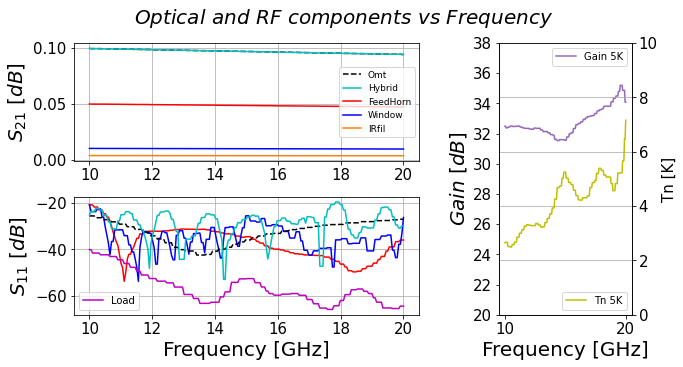

In [32]:
#######################-------------------------------------------------------------------------####################
####################### ------Graphics input signals RL,IL, GAIN, Tnoise --------####################
grid = plt.GridSpec(2, 3, wspace=0.6, hspace=0.3)
plt.subplots(figsize=(10, 5))
plt.subplot(grid[0, :2])
#######################----------------------#############################
plt.plot(xx1,Qs,label='Omt',color='k', linestyle='dashed')
plt.plot(xx1,Qs,label='Hybrid',color='c')
plt.plot(xx1,Ws,label='FeedHorn',color='r')
plt.plot(xx1,Rs,label='Window',color='b')
plt.plot(xx1,Es,label='IRfil',color='tab:orange')
plt.tick_params(labelsize=15,axis='both',which='both')
plt.ylabel(r'$S_{21}\ [dB]$', fontsize=20)
plt.legend(loc='best', fontsize=9)
plt.grid()

plt.subplot(grid[1, :2])
plt.plot(xx1,data_RL_FH,color='r')
plt.plot(xx1,data_RL_W,color='b')
plt.plot(xx1,data_RL_omt,color='k',linestyle='dashed')
plt.plot(xx1,data_RL_hyb,color='c')
plt.plot(xx1,data_RL_load,label='Load',color='m')
plt.tick_params(labelsize=15,axis='both',which='both')
plt.ylabel(r'$S_{11}\ [dB]$', fontsize=20)
plt.legend(loc='best', fontsize=10)
plt.xlabel(r'Frequency [GHz]', fontsize=20)
plt.grid()

plt.subplot(grid[0:, 2])
plt.suptitle(r'$Optical \ and \ RF \ components \ vs \ Frequency$', fontsize=20)
plt.plot(xx1, data_gain_lna,label='Gain 5K',color='tab:purple')
plt.tick_params(labelsize=15,axis='both',which='both')
plt.ylabel(r'$Gain\ [dB]$', fontsize=20)
plt.legend(loc='best', fontsize=10)
plt.xlabel(r'Frequency [GHz]', fontsize=20)
plt.ylim(20,38)
ax2 = plt.gca().twinx() 
ax2.plot(xx1, U,label='Tn 5K', color='y')
ax2.set_ylabel('Tn [K]',fontsize=15, color='k')  # Etiqueta para el segundo eje Y
ax2.tick_params(axis='y',labelsize=15, labelcolor='k')
ax2.set_ylim(0, 10)
ax2.legend(loc='lower right')
plt.grid()
plt.savefig('results_graphs_V1/relative_condi.pdf')
plt.savefig('results_graphs_V1/relative_condi.png')

# Simulation

In [33]:
##### losses per component
#"""""
hw=(np.ones(n)-Z)*(np.ones(n)-R)*(np.ones(n)-SPOw)
hirf=(np.ones(n)-RLirf)*(np.ones(n)-E)*(np.ones(n)-SPOirf)
hfhs=(np.ones(n)-V)*(np.ones(n)-W)
homts=(np.ones(n)-X)*(np.ones(n)-Q)
hfhl=(np.ones(n)-V)*(np.ones(n)-W)
homtl=(np.ones(n)-X)*(np.ones(n)-Q)
hhyb1=(np.ones(n)-C)*(np.ones(n)-Q)
hhyb2=(np.ones(n)-C)*(np.ones(n)-Q)
hlna1=(1-RLlna1s)
hlna2=(1-RLlna2s)
hlna3=(1-RLlna3l)
hlna4=(1-RLlna4l)
hload=(np.ones(n)-M)*(1-SPO)
#"""""


In [34]:
##### summations for Insertion losses and Return losses
#"""""
sum_tem_IL_sky=(Tw*R*hirf*hfhs*homts*0.5*(1-SPOw))+ (Tirf*E*hfhs*homts*0.5*(1-SPOirf))+(Tfhs*W*homts*0.5)+(Tomts*Q)+(Ths*Q*(2/hhyb1))
sum_tem_IL_load=(Tfhl*W*homtl*0.5)+(Tomtl*Q)
sum_R_sky=(Z*hirf*hfhs*homts*0.5*(Tenv1/Tenv2))+(RLirf*hfhs*homts*0.5*(1-SPOirf))+(V*homts*0.5)+(X)+(C*(2/hhyb1))+(RLlna1s*(2/(hhyb1*(1-RLlna1s)*N)))
sum_R_load=(M*(1-SPO)*hfhl*homtl*0.5)+(V*homtl*0.5)+(X)
#"""""

In [35]:
####### losses in each output due to hybrid1 and LNA
a1=hhyb1*(1-RLlna1s)
b1=hhyb1*(1-RLlna2s)
c1=hhyb2*(1-RLlna3l)
d1=hhyb2*(1-RLlna4l)
############-----------------------------------------------------------
### sky temperature losses due to components
a2=hw*hirf*hfhs*homts*0.5
### load temperature losses due to components
a3=hfhl*homtl*0.5*(np.ones(n)-M)*(1-SPO)
### cryo1, cryo2, cryo3 temperature losses due to components
a8=hirf*hfhs*homts*0.5*(SPOw)
a9=hfhs*homts*0.5*(SPOirf)
a10=hfhl*homtl*0.5*(SPO)

In [36]:
######################## system equations when the signal pass the first hybrid (X)
### Gain --> N
#"""""
Tnlna1s=U
A1_T=(N/(np.ones(n)*2))*a1*((Tsky*a2+Tl*a3)+(sum_tem_IL_sky+sum_tem_IL_load)+Tenv2*(sum_R_sky+sum_R_load)+((Tcryo1*a8+Tcryo2*a9)+(Tcryo3*a10)))
A2_T=(N/(np.ones(n)*2))*b1*((Tsky*a2-Tl*a3)+(sum_tem_IL_sky-sum_tem_IL_load)+Tenv2*(sum_R_sky-sum_R_load)+((Tcryo1*a8+Tcryo2*a9)-(Tcryo3*a10)))
B1_T=(N/(np.ones(n)*2))*c1*((Tsky*a2+Tl*a3)+(sum_tem_IL_sky+sum_tem_IL_load)+Tenv2*(sum_R_sky+sum_R_load)+((Tcryo1*a8+Tcryo2*a9)+(Tcryo3*a10)))
B2_T=(N/(np.ones(n)*2))*d1*((Tsky*a2-Tl*a3)+(sum_tem_IL_sky-sum_tem_IL_load)+Tenv2*(sum_R_sky-sum_R_load)+((Tcryo1*a8+Tcryo2*a9)-(Tcryo3*a10)))
#"""""
######### temperature outputs after the hybrid X
print(A1_T[0]/N[0])
print(A2_T[0]/N[0])
print(B1_T[0]/N[0])
print(B2_T[0]/N[0])

4.8723677980085505
1.100276817902558
4.8723677980085505
1.100276817902558


In [37]:
###### second hybrid ###### in the FPGA
########### SIGNAL IS RECOVERED, Tn is added. output of second hybrid (Y) is obtained
#"""""
G1=N
G2=N
G3=N
G4=N
#Tnlna1s=Tnlna1s*np.ones(n)
Tnlna1s=U

Z1=(((A1_T+A2_T)*2)+(Tnlna1s*(G1)+Tnlna1s*(G2)))/2
Z2=(((A1_T-A2_T)*2)+(Tnlna1s*(G1)+Tnlna1s*(G2)))/2
Z3=(((B1_T+B2_T)*2)+(Tnlna1s*(G3)+Tnlna1s*(G4)))/2
Z4=(((B1_T-B2_T)*2)+(Tnlna1s*(G3)+Tnlna1s*(G4)))/2

############ OUTPUT TEMPERATURE AFTER SECOND HYBRID
print(Z1[0]/G1[0])
print(Z2[0]/G1[0])
print(Z3[0]/G1[0])
print(Z4[0]/G1[0])


8.623497181796212
6.422943545991095
8.623497181796212
6.422943545991095


In [38]:
##### T sky and T load are obtained Tsky=Z1+z3 Tload=Z2+Z4
t_sky=(Z1/G1+Z3/G2)
t_load=(Z2/G3+Z4/G4)
#print('resultados sky and load')
print(np.mean(t_sky),np.mean(t_load))
print('substraction',np.mean(t_sky)-np.mean(t_load))
#"""""

20.01337850110535 15.904248062936292
substraction 4.109130438169059


In [39]:
# Combinar los arrays en una matriz
#data = np.column_stack((xx1,t_sky,t_load))
# Guardar en un archivo
#np.savetxt("datos_sky_load.txt", data, header="F sky load", fmt="%.5f", delimiter=" ")

In [40]:
##### sky and load temperature when the system have losses, and those are constant
absoluto_tsky=20.01337850110535
absoluto_tload=15.904248062936292

In [41]:
absoluto_tsky-np.mean(t_sky)

0.0

In [42]:
absoluto_tload-np.mean(t_load)

0.0

In [43]:
###### Temperature variations of sky and load due to fluctuations in the losses.
## We calculated the mean value of temperature for sky and load over the band, and then we substract
## this mean value from the measured temperature, this to normalize the response and observer the 
## the temperature differences through the frequency band.

prom_sky=t_sky-np.mean(t_sky)
prom_load=t_load-np.mean(t_load)

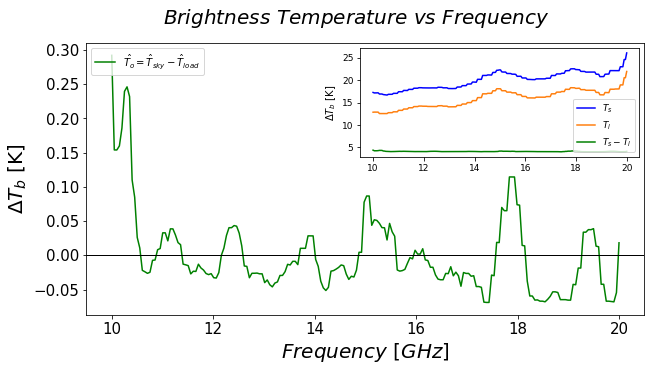

In [44]:
########### Temperature variations trhough the frequeny band 
###############
fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle(r'$Brightness \ Temperature \ vs \ Frequency$', fontsize=20)
ax.plot(xx1,(prom_sky-prom_load),color='g',label='$\hat{T_{o}}=\hat{T}_{sky}-\hat{T}_{load}$')
ax.set_ylabel(r'$\Delta T_b\ [\rm K]$',fontsize=20)
ax.set_xlabel(r'$Frequency\ [GHz]$',fontsize=20)
ax.tick_params(labelsize=15,axis='both',which='both')
ax.legend(loc='upper left', fontsize=10)
plt.axhline(0, color = "k", linewidth = 1)

# Crear una gráfica dentro usando inset_axes
inset_ax = inset_axes(ax, width="50%", height="40%", loc="upper right")  # Tamaño relativo
inset_ax.plot(xx1,t_sky,color='b',label='$T_s$')
inset_ax.plot(xx1,t_load,color='tab:orange',label='$T_l$')
inset_ax.plot(xx1,t_sky-t_load,color='g',label='$T_s-T_l$')
inset_ax.set_ylabel(r'$\Delta T_b\ [\rm K]$',fontsize=10)
#inset_ax.set_xlabel(r'$Frequency\ [GHz]$',fontsize=10)
inset_ax.tick_params(labelsize=9,axis='both',which='both')
inset_ax.legend(loc='lower right', fontsize=9)
plt.savefig('results_graphs_V1/relative_resul_total.pdf')
plt.savefig('results_graphs_V1/relative_resul_total.png')

In [45]:
### temperature variations within frquency bands of 2.5 GHz
tot_sky=t_sky
tot_load=t_load

A=tot_sky[0]-tot_sky[50] # 10-12.5GHz
B=tot_sky[50]-tot_sky[100] # 12.5-15GHz
C=tot_sky[100]-tot_sky[150] # 15-17.5GHz
D=tot_sky[150]-tot_sky[199] # 17.5-20GHz
resul_arr=[A,B,C,D]
grupos = ['10-12.5','12.5-15','15-17.5','17.5-20']
valores1 = [(A),(B),(C),(D)]
### operaciones cada 2.5GHz para load
Al=tot_load[0]-tot_load[50] # 10-12.5GHz
Bl=tot_load[50]-tot_load[100] # 12.5-15GHz
Cl=tot_load[100]-tot_load[150] # 15-17.5GHz
Dl=tot_load[150]-tot_load[199] # 17.5-20GHz
resul_arrl=[Al,Bl,Cl,Dl]
print('10-12.5GHz',Al,'12.5-15GHz',Bl,'15-17.5GHz',Cl,'17.5-20GHz',Dl)
grupos = ['10-12.5','12.5-15','15-17.5','17.5-20']
valores1l = [(Al),(Bl),(Cl),(Dl)]
# substraction from tsky-tload for relative measurements
A_diff=A-Al
B_diff=B-Bl
C_diff=C-Cl
D_diff=D-Dl

# Datos
grupos = ['10-12.5','12.5-15','15-17.5','17.5-20']
valores_diff = [(A_diff),(B_diff),(C_diff),(D_diff)]
print(valores_diff)

10-12.5GHz -1.2617485951658605 12.5-15GHz -3.957961381147861 15-17.5GHz 0.6253111472819519 17.5-20GHz -4.46900571012797
[0.25966069896446875, -0.05423100465715791, 0.11642240008978533, -0.048100698017101706]


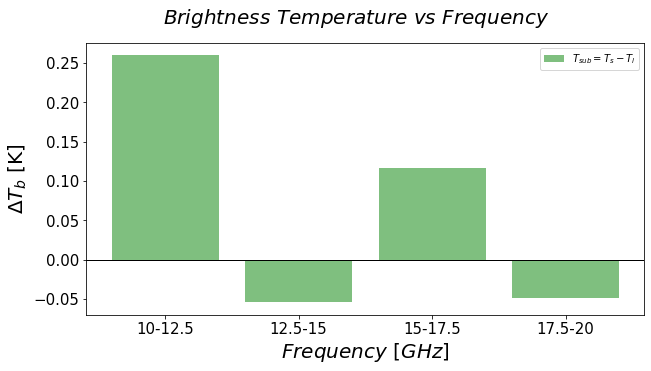

In [46]:
# Crear figura principal
fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle(r'$Brightness \ Temperature \ vs \ Frequency$', fontsize=20)
ax.bar(grupos, np.array(valores_diff),color='g',label='$T_{sub}=T_s-T_l$',alpha=0.5)
ax.set_ylabel(r'$\Delta T_b\ [\rm K]$',fontsize=20)
ax.set_xlabel(r'$Frequency\ [GHz]$',fontsize=20)
ax.tick_params(labelsize=15,axis='both',which='both')
ax.legend(loc='best', fontsize=10)
#ax.set_ylim(-0.15,0.45)
plt.axhline(0, color = "k", linewidth = 1)

# Crear una gráfica dentro usando inset_axes
#inset_ax = inset_axes(ax, width="50%", height="40%", loc="upper right")  # Tamaño relativo
#inset_ax.bar(grupos, np.array(valores1),color='b',label='<sky>',alpha=0.5)
#inset_ax.bar(grupos, np.array(valores1l),label='<load>',color='tab:orange',alpha=0.5)
#inset_ax.bar(grupos, np.array(valores_diff),color='g',label='<sky>-<load>',alpha=0.5)
#inset_ax.set_ylabel(r'$\Delta T_b\ [\rm K]$',fontsize=10)

#inset_ax.set_xlabel(r'$Frequency\ [GHz]$',fontsize=10)
inset_ax.tick_params(labelsize=9,axis='both',which='both')
inset_ax.legend(loc='best', fontsize=9)
plt.savefig('results_graphs_V1/relative_resul_bar_tot.pdf')
plt.savefig('results_graphs_V1/relative_resul_bar_tot.png')

In [47]:
################## Component TEMPERATURE CONTRIBUTION
## Branch 1 -->> sky
gainw=(Tw)*ILw*(1-SPOw)+Tcryo1*SPOw
print('window',np.mean(gainw))
gainirf=(Tirf*ILirf*(1-SPOirf))+(Tcryo2*SPOirf)/(hw)
print('filter',np.mean(gainirf))
gainfhs=((Tfhs)*ILfhs)/(hw*hirf)
print('feedhorn sky',np.mean(gainfhs))
gainomts1=((Tomts)*ILomts)/(hw*hirf*hfhs)
print('omt sky out1',np.mean(gainomts1))
gainhyb2=((Ths)*ILhs)/(hw*hirf*hfhs*homts)
print('hybrid sky out2',np.mean(gainhyb2))


window 3.683081044701678
filter 0.5407157028254084
feedhorn sky 0.0588002721552059
omt sky out1 0.11831168115603258
hybrid sky out2 0.1210807878930581


In [48]:
## Branch 2 -->> load
gainload=Tl*RLload*(1-SPO)+Tcryo3*SPO
print('load',np.mean(gainload))
gainfhl=((Tfhl)*ILfhl)/(hload)
print('feedhorn load',np.mean(gainfhs))
gainomts1=((Tomtl)*ILomtl)/(hload*hfhl)
print('omt load out1',np.mean(gainomts1))
gainhyb2=(Ths)*ILhs/(hload*hfhl*homtl)
print('hybrid sky out3',np.mean(gainhyb2))


load 0.0008000000000000001
feedhorn load 0.0588002721552059
omt load out1 0.11516212388495196
hybrid sky out3 0.11785746641571272


# Equations embebed

In [49]:
## We obtained a linear equation to characterize TMS 

Text(0, 0.5, 'T[K]')

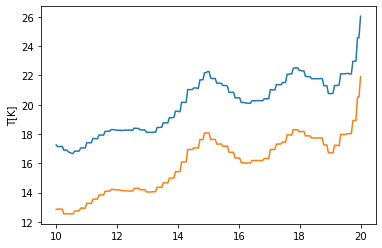

In [50]:
#### Input temperature (sky and load)
t_sky_r=8*np.ones(n)
t_load_r=8*np.ones(n)
#### Temperature offset
offs1=((sum_tem_IL_sky+sum_tem_IL_load)+Tenv2*(sum_R_sky+sum_R_load)+((Tcryo1*a8+Tcryo2*a9)+(Tcryo3*a10)))
offl2=((sum_tem_IL_sky-sum_tem_IL_load)+Tenv2*(sum_R_sky-sum_R_load)+((Tcryo1*a8+Tcryo2*a9)-(Tcryo3*a10)))

#### losses and physical component temperatures.
e1=((t_sky_r*a2+t_load_r*a3)+offs1)
e2=((t_sky_r*a2-t_load_r*a3)+offl2)
g1=N
Tn1=Tnlna1s
##### Main equations. We assume a global gain and Noise temperature
sky_gth=(g1)*(a1*((e1)+((e2)))+(2*Tn1))
load_gth=(g1)*(a1*((e1)-((e2)))+(2*Tn1))
############# Signal reconstructued 
plt.plot(xx1,sky_gth/g1)
plt.plot(xx1,load_gth/g1)
plt.ylabel('T[K]')

In [51]:
print(np.mean(sky_gth/g1))
print(np.mean(load_gth/g1))
print(20.01337850110535-np.mean(sky_gth/g1))
print(15.904248062936292-np.mean(load_gth/g1))

20.01337850110535
15.904248062936292
0.0
0.0


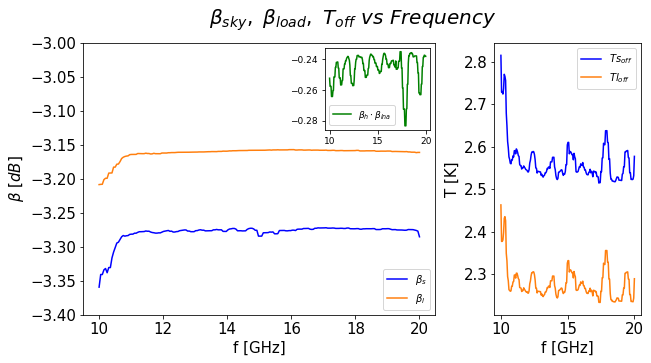

In [52]:
# Crear figura y especificar el diseño de gridspec
fig = plt.figure(figsize=(10, 5))
grid = gridspec.GridSpec(2, 3, figure=fig,wspace=0.4)  # Una rejilla de 2 filas y 3 columnas

# Crear un subplot que ocupe las filas completas y las dos primeras columnas
ax = fig.add_subplot(grid[0:, :2])
plt.suptitle(r'$\beta_{sky} , \ \beta_{load} , \ {T}_{off} \ vs \ Frequency$', fontsize=20)
# Dibujar algo en este subplot

ax.plot(xx1,10*np.log10(a2),label=r'$ \beta_{s} $',color='b')
ax.plot(xx1,10*np.log10(a3),label=r'$ \beta_{l} $',color='tab:orange')
#ax.set_title("Gráfico usando GridSpec")
ax.set_ylabel(r'$ \beta \ [dB]$',fontsize=15)
ax.set_xlabel('f [GHz]',fontsize=15)
ax.set_ylim(-3.40,-3)
ax.tick_params(labelsize=15,axis='both',which='both')
ax.legend(loc='lower right')

# Crear una gráfica dentro usando inset_axes
inset_ax = inset_axes(ax, width="30%", height="30%", loc="upper right")  # Tamaño relativo
inset_ax.plot(xx1,10*np.log10(a1),color='g',label=r'$ \beta_{h}\cdot\beta_{lna} $')
#inset_ax.set_ylabel(r'$ [dB]$',fontsize=15)
#inset_ax.set_xlabel(r'$Frequency\ [GHz]$',fontsize=10)
inset_ax.tick_params(labelsize=9,axis='both',which='both')
inset_ax.legend(loc='lower left', fontsize=9)

# Agregar otro subplot como referencia (opcional)
ax2 = fig.add_subplot(grid[0:, 2:])  # Subplot en la primera fila, última columna
ax2.plot(xx1,offs1,label=r'$ {Ts}_{off} $',color='b')
ax2.plot(xx1,offl2,label=r'$ {Tl}_{off} $',color='tab:orange')
#ax2.set_title("Otro gráfico")
ax2.set_xlabel('f [GHz]',fontsize=15)
ax2.set_ylabel('T [K]',fontsize=15)
ax2.tick_params(labelsize=15,axis='both',which='both')
ax2.legend(loc='upper right')
plt.savefig('results_graphs_V1/betas_offset.pdf')
plt.savefig('results_graphs_V1/betas_offset.png')

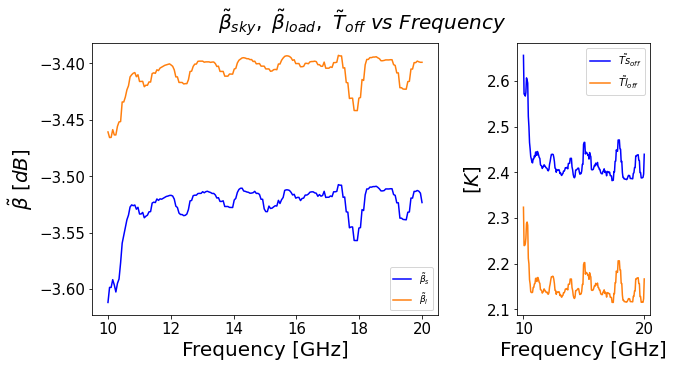

In [53]:
#######################-------------------------------------------------------------------------####################
####################### ------Graphics input signals RL,IL, GAIN, Tnoise --------####################
grid = plt.GridSpec(2, 3, wspace=0.6, hspace=0.3)
plt.subplots(figsize=(10, 5))
plt.subplot(grid[0:, :2])
#######################----------------------#############################
plt.plot(xx1,10*np.log10(a2*a1),label=r'$ \tilde{\beta}_{s}$',color='b')
plt.plot(xx1,10*np.log10(a3*a1),label=r'$\tilde{\beta}_{l} $',color='tab:orange')
plt.suptitle(r'$\tilde{\beta}_{sky} , \ \tilde{\beta}_{load} , \ \tilde{T}_{off} \ vs \ Frequency$', fontsize=20)
plt.tick_params(labelsize=15,axis='both',which='both')
plt.xlabel(r'Frequency [GHz]', fontsize=20)
plt.ylabel(r'$ \tilde{\beta} \ [dB]$', fontsize=20)
plt.legend(loc='best', fontsize=9)


plt.subplot(grid[0:, 2])
plt.plot(xx1,offs1*a1,label=r'$ \tilde{Ts}_{off} $',color='b')
plt.plot(xx1,offl2*a1,label=r'$ \tilde{Tl}_{off} $',color='tab:orange')

plt.tick_params(labelsize=15,axis='both',which='both')
plt.ylabel(r'$ [K]$', fontsize=20)
plt.legend(loc='best', fontsize=10)
plt.xlabel(r'Frequency [GHz]', fontsize=20)
plt.savefig('results_graphs_V1/betas_offset_t.pdf')
plt.savefig('results_graphs_V1/betas_offset_t.png')